In [1]:
from tensorflow.keras import datasets, utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense,Activation,Flatten
from keras.layers import Dropout
def make_data():
    # 다운로드 경로: 사용자 계정 디렉토리 하위의 .keras 디렉토리
    (X_train, y_train),(X_test,y_test)=datasets.cifar10.load_data()
    # 원 핫 인코딩 처리
    y_train=utils.to_categorical(y_train,10)
    y_test=utils.to_categorical(y_test,10)
    # 0~255 => 0.0~1.0 데이터 정규화
    X_train=X_train.astype("float32")
    X_test=X_test.astype("float32")
    X_train /= 255
    X_test /= 255
    return (X_train, y_train), (X_test, y_test)

In [2]:
from keras import optimizers
def make_model():
    model=Sequential()
    # 합성곱층, 필터 수 32, 3x3, padding='same' 입력/출력
    # convolution layer1
    # padding="same" 출력크기를 입력크기와 같게 유지
    model.add(Conv2D(32,(3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    # convolution layer2
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # 드롭아웃 과적합을 방지하기 위한 처리 / 출력신호 25% off, 과적합 방지
    model.add(Dropout(0.25))
    # convolution layer3
    model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
    # convolution layer4
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten()) # 다차원 => 1차원
    model.add(Dense(512,activation='relu'))
    # 출력층
    model.add(Dense(10,activation='softmax'))
    # learning_rate 학습률 0.0001, decay 학습속도를 감소시키는 옵션
    opt=optimizers.RMSprop(lr=0.0001, decay=1e-6)
    model.compile(loss="categorical_crossentropy",
    optimizer=opt,metrics=["accuracy"])
    return model

In [3]:
a=isinstance(1, int) # True
b=isinstance(1.2, float) # True
def plot_loss(history, title=None):
    # history가 dict 타입이 아니면
    if not isinstance(history, dict):
        history=history.history
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    # 타이틀이 설정되어 있지 않으면
    if title is not None:
        plt.title(title)
    plt.ylabel("손실") 
    plt.xlabel("에포크") 
    plt.legend(["학습 데이터 성능", "검증 데이터 성능"], loc=0)

def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history=history.history
    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])
    if title is not None:
        plt.title(title)
    plt.ylabel("정확도")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능","검증 데이터 성능"],loc=0) 

In [4]:
(X_train,y_train),(X_test,y_test)=make_data()

170508288/170498071 [==============================] - 3s 0us/step


In [5]:
X_train.shape


(50000, 32, 32, 3)

In [6]:
# from six.moves import cPickle
# import numpy as np
# import matplotlib.pyplot as plt
# f=open("c:/users/user/.keras/datasets/cifar-10-batches-py/data_batch_1","rb")
# datadict=cPickle.load(f, encoding="latin1")
# X=datadict["data"]
# y=datadict["labels"]
# X=X.reshape(10000,3,32,32).transpose(0,2,3,1).astype("uint8")
# y=np.array(y)
# fig, axes1=plt.subplots(10,10,figsize=(15,15))
# for j in range(10):
#     for k in range(10):
#         i = np.random.choice(range(len(X)))
#         axes1[j][k].set_axis_off()
#         axes1[j][k].imshow(X[i:i+1][0])

In [7]:
from six.moves import cPickle
from tensorflow.keras import optimizers
# 모델 생성
model=make_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [8]:
import tensorflow as tf
with tf.device('/GPU:0'):
    history=model.fit(X_train,y_train,epochs=20,batch_size=32, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 199s 157ms/step - loss: 1.7736 - accuracy: 0.3537 - val_loss: 1.5436 - val_accuracy: 0.4447
Epoch 2/20
1250/1250 [==============================] - 195s 156ms/step - loss: 1.4926 - accuracy: 0.4595 - val_loss: 1.3987 - val_accuracy: 0.4964
Epoch 3/20
1250/1250 [==============================] - 191s 153ms/step - loss: 1.3632 - accuracy: 0.5110 - val_loss: 1.2762 - val_accuracy: 0.5373
Epoch 4/20
1250/1250 [==============================] - 197s 158ms/step - loss: 1.2622 - accuracy: 0.5519 - val_loss: 1.1833 - val_accuracy: 0.5864
Epoch 5/20
1250/1250 [==============================] - 195s 156ms/step - loss: 1.1758 - accuracy: 0.5885 - val_loss: 1.1004 - val_accuracy: 0.6198
Epoch 6/20
1250/1250 [==============================] - 199s 159ms/step - loss: 1.1033 - accuracy: 0.6119 - val_loss: 1.0568 - val_accuracy: 0.6300
Epoch 7/20
1250/1250 [==============================] - 203s 163ms/step - loss: 1.0408 - accuracy: 0.6346 - val_

In [11]:
# 성능 평가
model.evaluate(X_test,y_test,batch_size=128)


79/79 [==============================] - 10s 130ms/step - loss: 0.7347 - accuracy: 0.7507


[0.7346736192703247, 0.7506999969482422]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_

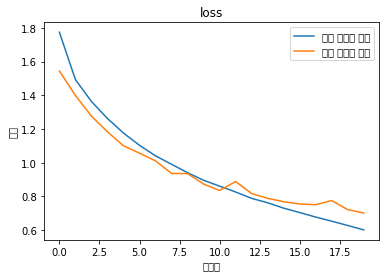

In [15]:
import matplotlib.pylab as plt
import matplotlib
import matplotlib.font_manager as fm
plot_loss(history,"loss") 
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_

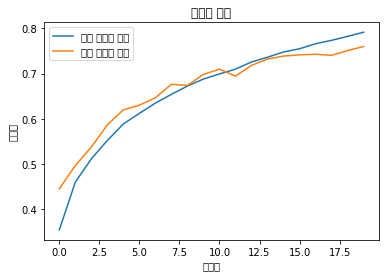

In [16]:
plot_acc(history, '정확도 추이') 
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred=model.predict(X_test,verbose=1)
y_pred=np.argmax(y_pred, axis=1)
confusion_matrix(np.argmax(y_test,axis=1),y_pred)

313/313 [==============================] - 11s 36ms/step


array([[806,  21,  32,  22,  15,   6,  12,  14,  45,  27],
       [  7, 883,   4,   8,   1,   3,  13,   2,  10,  69],
       [ 69,   6, 586,  73,  79,  69,  66,  38,   8,   6],
       [ 17,   8,  39, 599,  45, 152,  76,  36,  11,  17],
       [ 20,   3,  54,  71, 652,  36,  50, 103,   8,   3],
       [ 15,   1,  29, 184,  31, 668,  18,  47,   2,   5],
       [  4,   3,  30,  55,  28,  22, 847,   7,   3,   1],
       [  9,   3,  19,  42,  36,  43,   9, 831,   1,   7],
       [ 69,  44,  11,  19,   2,   7,  10,   3, 805,  30],
       [ 29,  65,   3,  25,   1,   7,  10,  20,  10, 830]])

In [22]:

from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/data/cifar')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
INFO:tensorflow:Assets written to: /content/drive/MyDrive/data/cifar/assets
